<a href="https://colab.research.google.com/github/ZPavlo/ML_projects/blob/master/EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
PATH = "/content/gdrive/My Drive"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Morphological transformations

In [0]:
import os 
import numpy as np
import scipy.signal as signal
import cv2
import matplotlib.pyplot as plt

In [0]:
def show_img(img):
  plt.axis('off')
  plt.imshow(img, cmap='gray')

(150, 112)


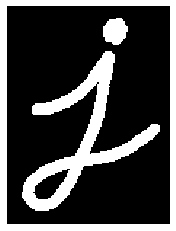

In [4]:
IMG_PATH = os.path.join(PATH, "test_img/j.png")
img1 = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
print(img1.shape)
show_img(img1)

(555, 986)


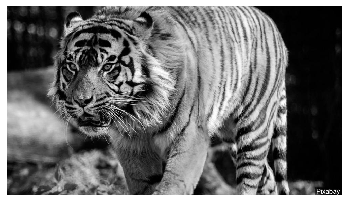

In [5]:
IMG_PATH = os.path.join(PATH, "test_img/tiger.jpg")
img2 = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
print(img2.shape)
show_img(img2)

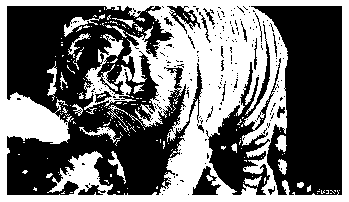

In [6]:
img2_bin = ((img2 / 256.0) >= 0.5).astype("uint8")
show_img(img2_bin)

(334, 500)


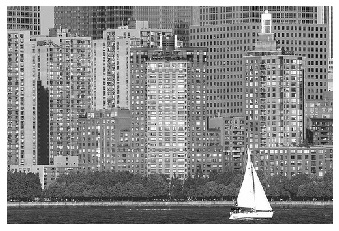

In [7]:
IMG_PATH = os.path.join(PATH, "test_img/city.jpg")
img3 = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
print(img3.shape)
show_img(img3)

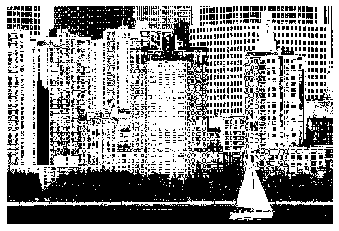

In [8]:
img3_bin = ((img3 / 256.0) >= 0.5).astype("uint8")
show_img(img3_bin)

### *Erosion*
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).



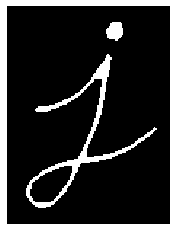

In [9]:
def my_erosion(img, ksize=5):
    """
      Only for binery image
      img: (h, w)
    """

    img = img / 255.0
    kernel = np.ones((ksize, ksize))
    new_img = signal.convolve2d(img, kernel, boundary='symm', mode='same')
    return ((new_img == kernel.size) * 255.0).astype("uint8")
my_ero_img = my_erosion(img1)
show_img(my_ero_img)

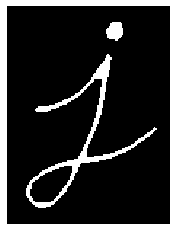

In [10]:
kernel = np.ones((5,5),np.uint8)
cv_ero_img = cv2.erode(img1, kernel)
show_img(cv_ero_img)

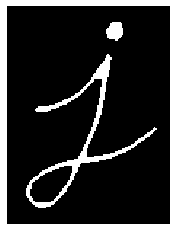

In [11]:
kernel = np.ones((3, 3),np.uint8)
cv_ero_img = cv2.erode(img1, kernel, iterations = 2)
show_img(cv_ero_img)

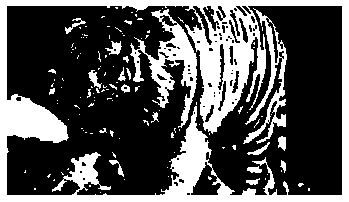

In [12]:
kernel = np.ones((5,5),np.uint8)
cv_ero_img2 = cv2.erode(img2_bin, kernel)
show_img(cv_ero_img2)

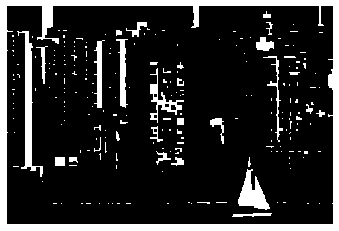

In [13]:
kernel = np.ones((5,5),np.uint8)
cv_ero_img2 = cv2.erode(img3_bin, kernel)
show_img(cv_ero_img2)

### *Dilation*
It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

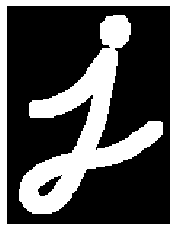

In [16]:
def my_dilation(img, ksize=5):
    """
      Only for binery image
      img: (h, w)
    """

    img = img / 255.0
    kernel = np.ones((ksize, ksize))
    new_img = signal.convolve2d(img, kernel, boundary='symm', mode='same')
    return ((new_img != 0) * 255.0).astype("uint8")
my_dil_img = my_dilation(img1)
show_img(my_dil_img)

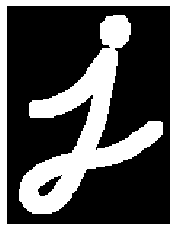

In [17]:
kernel = np.ones((5,5),np.uint8)
cv_dil_img = cv2.dilate(img1, kernel,iterations = 1)
show_img(cv_dil_img)

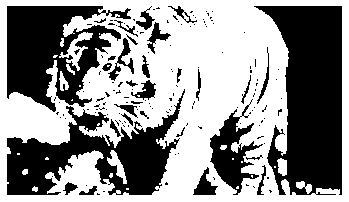

In [18]:
kernel = np.ones((5,5),np.uint8)
dil_img2 = cv2.dilate(img2_bin, kernel)
show_img(dil_img2)

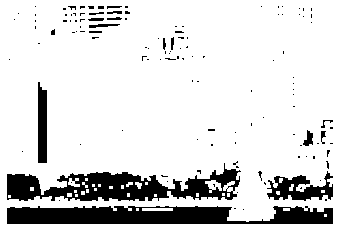

In [19]:
kernel = np.ones((5,5),np.uint8)
dil_img3 = cv2.dilate(img3_bin, kernel)
show_img(dil_img3)

### *Opening*
Opening is just another name of erosion followed by dilation.

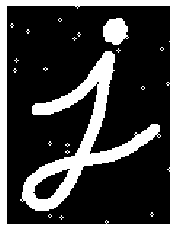

In [20]:
import random

def noisy_in_bin(img, color=255, size=30):
    new_img = img.copy()
    h, w = new_img.shape
    for i in range(size):
        y = random.randint(0, h)
        x = random.randint(0, w)
        # r = random.randint(1, 3)
        new_img = cv2.circle(new_img, (x, y), 1, color, 1).astype("uint8")

    return new_img

noisy_img_white = noisy_in_bin(img1)
show_img(noisy_img_white)

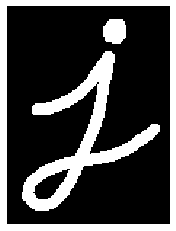

In [21]:
def my_open(img, ksize=5):
    new_img = my_erosion(img, ksize)
    new_img = my_dilation(new_img, ksize)
    return new_img

my_open_img = my_open(noisy_img_white)
show_img(my_open_img)

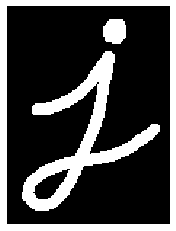

In [22]:
cv_open_img = cv2.morphologyEx(noisy_img_white, cv2.MORPH_OPEN, kernel)
show_img(cv_open_img)

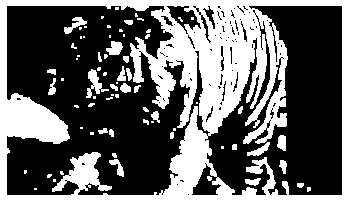

In [23]:
kernel = np.ones((7, 7),np.uint8)
cv_open_img2 = cv2.morphologyEx(img2_bin, cv2.MORPH_OPEN, kernel)
show_img(cv_open_img2)

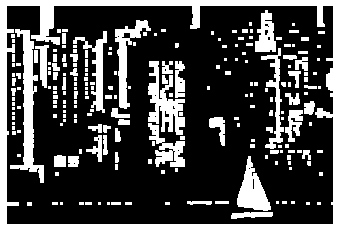

In [24]:
kernel = np.ones((5, 5),np.uint8)
cv_open_img3 = cv2.morphologyEx(img3_bin, cv2.MORPH_OPEN, kernel)
show_img(cv_open_img3)

### *Close*
Closing is reverse of Opening, Dilation followed by Erosion.

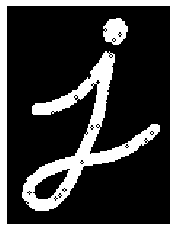

In [25]:
noisy_img_black = noisy_in_bin(img1, color=0, size=200)
show_img(noisy_img_black)

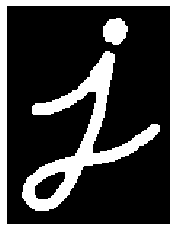

In [26]:
def my_close(img, ksize=5):

    new_img = my_dilation(img, ksize)
    new_img = my_erosion(new_img, ksize)
    return new_img

my_cl_img = my_close(noisy_img_black)
show_img(my_cl_img)

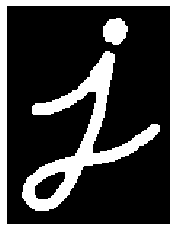

In [27]:
cv_cl_img = cv2.morphologyEx(noisy_img_black, cv2.MORPH_CLOSE, kernel)
show_img(cv_cl_img)

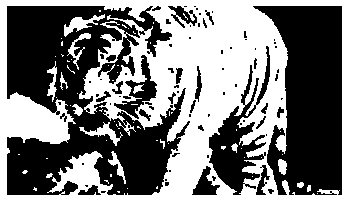

In [28]:
kernel = np.ones((5, 5),np.uint8)
cl_img2 = cv2.morphologyEx(img2_bin, cv2.MORPH_CLOSE, kernel)
show_img(cl_img2)

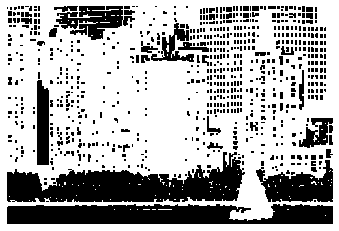

In [29]:
kernel = np.ones((3, 3),np.uint8)
cl_img3 = cv2.morphologyEx(img3_bin, cv2.MORPH_CLOSE, kernel)
show_img(cl_img3)

### *Morphological Gradient*
It is the difference between dilation and erosion of an image.

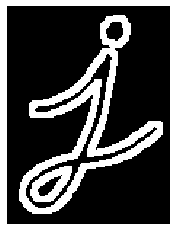

In [30]:
def my_gradient(img, ksize=5):

    img1 = my_dilation(img, ksize)
    img2 = my_erosion(img, ksize)
    new_img = (img1 != img2).astype("uint8")
    return new_img
my_grad_img = my_gradient(img1)
show_img(my_grad_img)

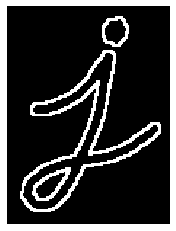

In [32]:
cv_grad_img = cv2.morphologyEx(img1, cv2.MORPH_GRADIENT, kernel)
show_img(cv_grad_img)

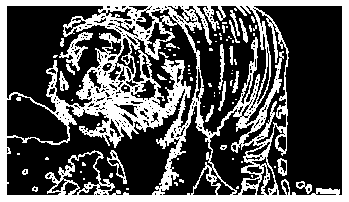

In [33]:
kernel = np.ones((5, 5),np.uint8)
show_img(cv2.morphologyEx(img2_bin, cv2.MORPH_GRADIENT, kernel))

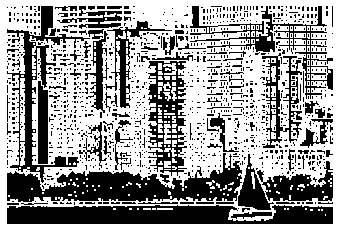

In [34]:
kernel = np.ones((3, 3),np.uint8)
show_img(cv2.morphologyEx(img3_bin, cv2.MORPH_GRADIENT, kernel))

### *Top Hat*

It is the difference between input image and Opening of the image.

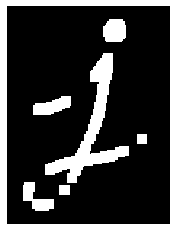

In [35]:
kernel = np.ones((7, 7),np.uint8)
cv_open_img = cv2.morphologyEx(noisy_img_white, cv2.MORPH_OPEN, kernel)
show_img(cv_open_img)

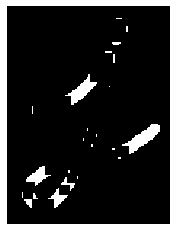

In [36]:
def my_tophat(img, ksize=5):
    
    my_open_img = my_open(img, ksize)
    return ((my_open_img.max() - my_open_img) == img).astype("uint8")
my_tophat_img = my_tophat(img1, ksize=7)
show_img(my_tophat_img)

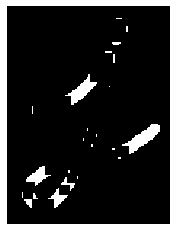

In [38]:
cv_tophat_img = cv2.morphologyEx(img1, cv2.MORPH_TOPHAT, kernel)
show_img(cv_tophat_img)

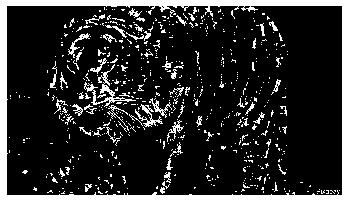

In [39]:
kernel = np.ones((9, 9),np.uint8)
show_img(cv2.morphologyEx(img2_bin, cv2.MORPH_TOPHAT, kernel))

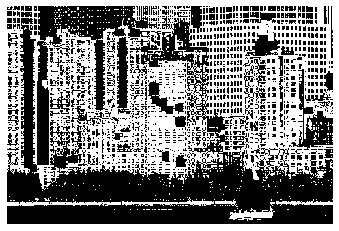

In [40]:
kernel = np.ones((9, 9),np.uint8)
show_img(cv2.morphologyEx(img3_bin, cv2.MORPH_TOPHAT, kernel))

### *Black Hat*

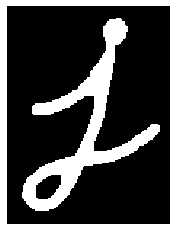

In [41]:
kernel = np.ones((7, 7),np.uint8)
cv_cl_img = cv2.morphologyEx(noisy_img_black, cv2.MORPH_CLOSE, kernel)
show_img(cv_cl_img)

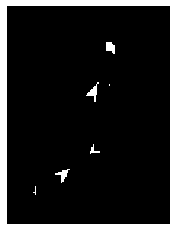

In [42]:
def my_blackhat(img, ksize=5):
    
    my_close_img = my_close(img, ksize)
    b = my_close_img == img
    return ((np.invert(my_close_img == img))).astype("uint8")

my_blackhat_img = my_blackhat(img1, ksize=7)
show_img(my_blackhat_img)

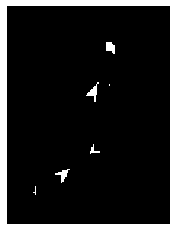

In [43]:
cv_blackhat_img = cv2.morphologyEx(img1, cv2.MORPH_BLACKHAT, kernel)
show_img(cv_blackhat_img)

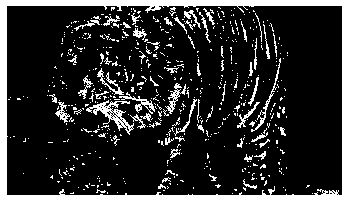

In [44]:
kernel = np.ones((9, 9),np.uint8)
show_img(cv2.morphologyEx(img2_bin, cv2.MORPH_BLACKHAT, kernel))

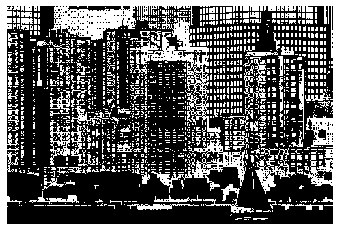

In [45]:
kernel = np.ones((9, 9),np.uint8)
show_img(cv2.morphologyEx(img3_bin, cv2.MORPH_BLACKHAT, kernel))

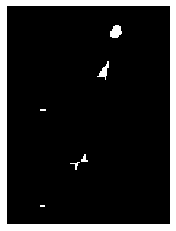

In [47]:
kernel = np.ones((8, 8),np.uint8)
cv_hitmiss_img = cv2.morphologyEx(img1, cv2.MORPH_HITMISS, kernel)
show_img(cv_hitmiss_img)